# Fit the complete data (V6 with the data with the wanted cuts)
- New:
    - We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - No additive cuts (only the cun $143<\Delta M < 148$)

- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_cutallPIDK_params.json', 'r') as f:
    MC_param_results = json.load(f)

with open(f'{loc.JSON}/data_KPiPi_2_params.json', 'r') as f:
    data_KPiPi_params = json.load(f)

with open(f'{loc.JSON}/data_strip_p/all_data_strip_params.json', 'r') as f:
    mu2_p = json.load(f)['mu2']
    
with open(f'{loc.JSON}/all_data_strip_cutDeltaM_Ds_weighted_V8_params.json', 'r') as f:
    data_B0Ds_params = json.load(f)

    
for var in 'muL', 'muR', 'sigmaL', 'sigmaR': # conversion GeV -> MeV
    data_KPiPi_params[var] = data_KPiPi_params[var]*1000
    data_KPiPi_params[f"{var}_err"] = data_KPiPi_params[f"{var}_err"]*1000

In [3]:
df = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M'],
                            cut_DeltaM=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip/all_data_strip.root


In [4]:
name_data = 'all_data_strip_cutDeltaM_V8'

## Distributions

### $\Delta M$ distribution

In [5]:
# df_DeltaM = fct.load_data(years, magnets, type_data='data_strip', vars=['Dst_M','D0_M'])
# df_DeltaM["Delta_M"] = df_DeltaM["Dst_M"] - df_DeltaM["D0_M"]
# fct.plot_hist({name_data: df_DeltaM},'Delta_M', '$\Delta M$', 'MeV/$c^2$', name_folder = name_data, colors='black')

### Init

In [5]:
n_events_B0_M = {}
d_initial_values = {}
n_Ds = {}
low = 5150.
high = 5550.

### Distribution $m(D_s\to3\pi)$

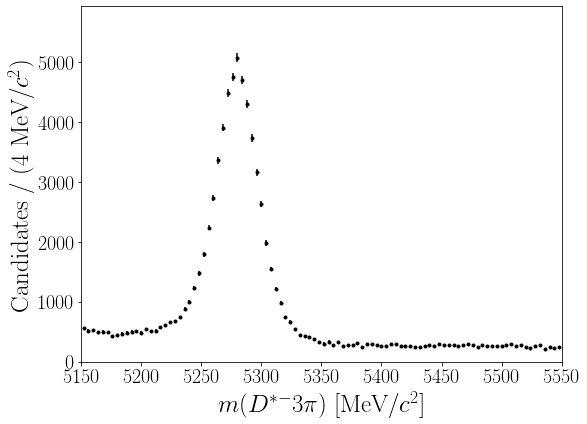

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_all_data_strip_cutDeltaM_V8_B0_cut.pdf


In [7]:
fct.plot_hist_particle({name_data+'_B0_cut':df},'B0_M',
              low = low, high = high,
              n_bins = 100, mode_hist = False, colors='black')

## Fit on $m(B^0)$

### Values for the fit $m(B^0)$

In [6]:
n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))

# n_sig           46290     +/- 3.9e+02  -3.9e+02   +3.9e+02       False
# n_bkg           30770     +/- 1.7e+03  -9.4e+02   +1.7e+03       False
# n_bkg2           1723     +/- 1.8e+03  -1.8e+03   +9.4e+02       False
# n_bkgK             90     +/-   0.037  -     58   +     58        True
# frac           0.4911     +/-   0.042  -  0.036   +  0.042       False
# mu               5279     +/-    0.11  -   0.11   +   0.11       False
# sigma            18.3     +/-    0.11  -    0.1   +   0.11       False
# lambda      -0.001134     +/- 0.00036  -0.00035   +0.00021       False
# sigma2            150     +/-    0.07  -     23   +     23        True

n_sig_k = 48000
n_bkg_k = 29000
n_bkg2_k = 1300
n_bkgK_k = 900



initial_values = {
    'mu'       :{ 'value': 5279.                         , 'low': 5279.-5.       , 'high': 5279.+5.             , 'floating': True},
    'sigmaL'   :{ 'value': 17.9                          , 'low': 17.-6.         , 'high': 17.+6.               , 'floating': True},
    'sigmaR'   :{ 'value': 17.9                          , 'low': 17.-6.         , 'high': 17.+6.               , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': None           , 'high': None                 , 'floating': False},
    'alphaR'   :{ 'value': -MC_param_results['alphaR_MC'], 'low': None           , 'high': None                 , 'floating': False},
    'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': None           , 'high': None                 , 'floating': False},
    'nR'       :{ 'value': MC_param_results['nR_MC']     , 'low': None           , 'high': None                 , 'floating': False},
    'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    'lambda'   :{ 'value': -0.0006                       , 'low': -0.01          , 'high': -0.00001             , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    'mu2'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
    'sigma2'   :{ 'value': 80.                           , 'low': 10.            , 'high': 5150.-mu2_p          , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    'n_bkgK'   :{ 'value': n_bkgK_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    'frac'     :{ 'value': 1.                            , 'low': 0              , 'high': 10.                  , 'floating': True},
}

for var in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    initial_values[f'{var}_K'] = {'value': data_KPiPi_params[var], 'low': None, 'high': None, 'floating': False}

for var in 'mu', 'sigma', 'n_sig' :
    initial_values[f'{var}_B0Ds'] = {'value': data_B0Ds_params[f'{var}_B0Ds'], 'low': None, 'high': None, 'floating': False}

In [7]:
5150.-mu2_p

92.30074417119795

## Simultaneous fit

### Observables and variables

In [8]:
obs = zfit.Space("x", limits=(low, high))

zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(var,
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [9]:
name_params_tau = {
    f'mu_tau':'$\mu_{m_{D_s}}$',
    f'sigma_tau':'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau':'$n_{bkg,c}$',
    f'n_sig_tau':'$n_{sig,D_s}$',
    f'lambda_tau':'$\\lambda$',
}

name_params = {
    f'mu'      : '$\mu$',
    f'sigmaL'  : '$\\sigma_L$',
    f'sigmaR'  : '$\\sigma_R$',    
    f'alphaL'  : '$\\alpha_L$',
    f'alphaR'  : '$\\alpha_R$',
    f'nL'      : '$n_L$',
    f'nR'      : '$n_R$',
    f'n_bkg'   : '$n_{bkg,c}$',
    f'n_sig'   : '$n_{sig,D^*3\pi}$',
    f'lambda'  : '$\\lambda$',
    f'mu2'     : '$\\mu_2$',
    f'sigma2'  : '$\\sigma_2$',
    f'n_bkg2'  : '$n_{bkg,D^*3\pi h}$',
    f'n_bkgK'  : '$n_{bkg,D^*K\pi\pi}$',
    'frac'     : '$f_{S, \\frac{L}{R}}$'
}

### PDFs

In [10]:
def sum_crystalball(muL, muR, sigmaL, sigmaR, alphaL, alphaR, nL, nR, frac, obs):
    crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL,
                                         alphaL,nL,
                                         obs=obs)
    crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR,
                                         alphaR, nR, 
                                         obs=obs)
    
    model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac)
    
    return model, crystalBallL, crystalBallR

In [11]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                          zparams['sigmaL'], zparams['sigmaR'],
                                                          zparams['alphaL'], zparams['alphaR'], 
                                                          zparams['nL'], zparams['nR'],
                                                          frac=zparams['frac'], obs=obs)

# doubleCB_Ds =  zfit.pdf.DoubleCB(zparams['mu_B0Ds'], zparams['sigma_B0Ds'],
#                                  zparams['alphaL_B0Ds'], zparams['alphaR_B0Ds'], 
#                                  zparams['nL_B0Ds'], zparams['nR_B0Ds'],
#                                  obs=obs)

gaussian_B0Ds = zfit.pdf.Gauss(zparams['mu_B0Ds'],zparams['sigma_B0Ds'],obs=obs)

model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                          zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                          zparams['alphaL_K'], zparams['alphaR_K'], 
                                                          zparams['nL_K'], zparams['nR_K'],
                                                          zparams['fraction_K'], obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)



# sum of the two PDFs
model_S_ext = model_S.create_extended(zparams['n_sig'])

#doubleCB_Ds_ext = doubleCB_Ds.create_extended(zparams['n_sigb_B0Ds'])

exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams['n_sig_B0Ds'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext, exp_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df['B0_M'], obs=obs)

### Fitting

In [12]:
result, params = launch_fit(model, data, extended=True)

------------------------------------------------------------------
| FCN = -4.257e+05              |     Ncalls=836 (836 total)     |
| EDM = 0.000268 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse         minuit_minos    at limit
------  ----------  --------------  -------------------  ----------
n_sig        51940     +/- 4.5e+02  -3.9e+02   +  4e+02     

    ------------------------------------------------------------------
    | FCN = -4.257e+05              |     Ncalls=836 (836 total)     |
    | EDM = 0.000268 (Goal: 0.001)  |            up = 0.5            |
    ------------------------------------------------------------------
    |  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
    ------------------------------------------------------------------
    |     True      |     True      |   False   |       False        |
    ------------------------------------------------------------------
    | Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
    ------------------------------------------------------------------
    |     False     |     True      |   True    |   True    | False  |
    ------------------------------------------------------------------
    name         value    minuit_hesse         minuit_minos    at limit
    ------  ----------  --------------  -------------------  ----------
    n_sig        51940     +/- 4.5e+02  -3.9e+02   +  4e+02       False
    n_bkg2       374.2     +/- 1.5e+02  -     93   +1.2e+02       False
    n_bkgK        1702     +/- 4.1e+02  -3.9e+02   +3.7e+02       False
    n_bkg        30220     +/- 5.5e+02  -4.9e+02   +  5e+02       False
    frac        0.3673     +/-    0.05  -  0.042   +  0.046       False
    mu            5280     +/-    0.11  -   0.11   +   0.11       False
    sigmaL       12.94     +/-    0.58  -   0.53   +   0.52       False
    sigmaR       21.84     +/-    0.44  -   0.36   +    0.4       False
    sigma2       33.43     +/-     7.7  -    4.9   +      6       False
    lambda  -0.0009767     +/- 0.00015  -0.00013   +0.00014       False

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:444: UserWarning: The function <function Space.limits at 0x7f861256b4d0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7f86125728c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


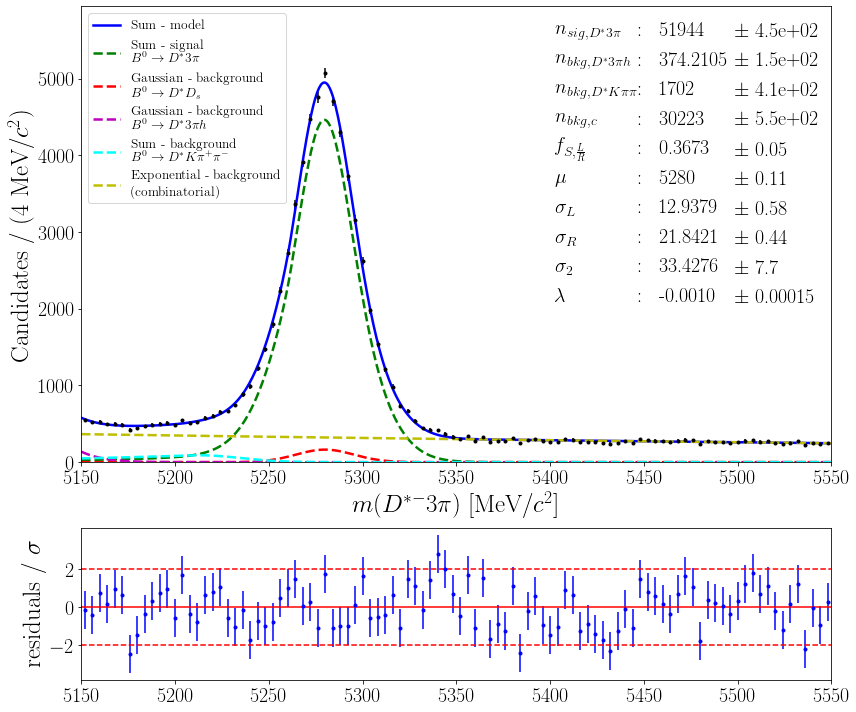

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V8/B0_M_all_data_strip_cutDeltaM_V8_fit.pdf


In [15]:
plot_hist_fit_particle(df,'B0_M', models = [model,model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = [None, '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data,
                       colors=['b','g','r','m','cyan','y'],
                       params=params,name_params=name_params, fontsize_leg=13.5,
                       colWidths=[0.06,0.01,0.05,0.06])

In [16]:
save_params(params,name_data,True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/all_data_strip_cutDeltaM_V8_params.json
